# Variational Autoencoder

In [2]:
import torch
import numpy as np

from src.data import get_mnist_batcher
from src.architecture import BasicVAE
import matplotlib.pyplot as plt
from src.plot import build_collage
from IPython.display import clear_output

In [3]:
batcher = get_mnist_batcher(batch_size=64)

vae = BasicVAE(latent_size=2)

Training

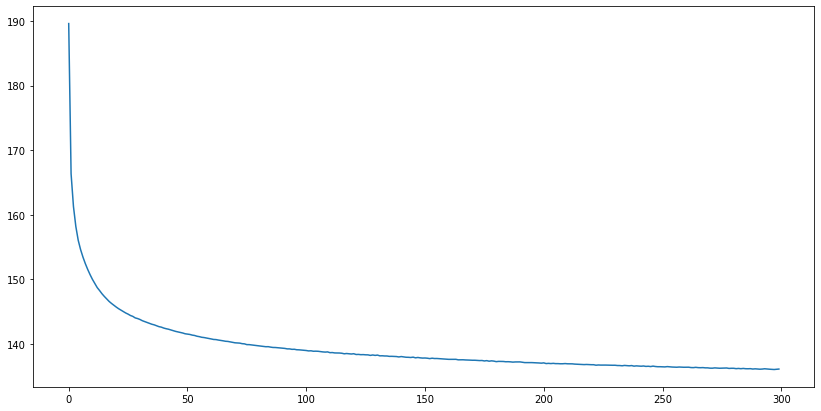

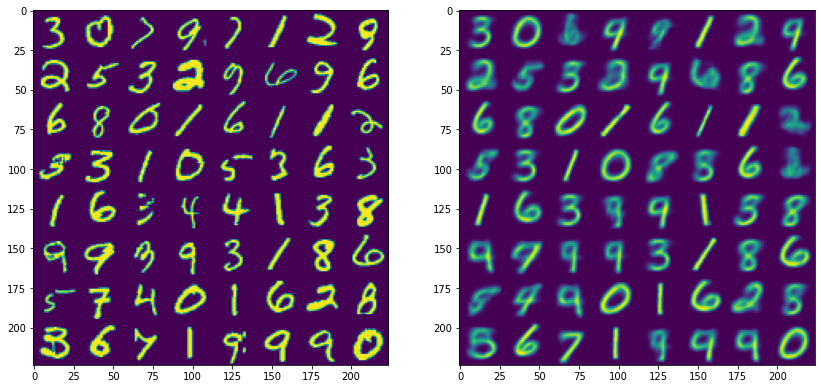

In [4]:
epoch_losses = []
for epoch in range(300):
    epoch_losses.append(0)
    for i, (x, y) in enumerate(batcher):
        loss, x_hat = vae.step(x)
        epoch_losses[-1]  += loss.data.numpy().mean()
    epoch_losses[-1] /= i
    clear_output(True)
    plt.figure(figsize=[14, 7])
    plt.plot(epoch_losses)
    plt.show()
    
    images = x.cpu().data.numpy().reshape(-1, 28, 28) * 256
    reconstructions = x_hat.cpu().data.numpy().reshape(-1, 28, 28) * 256

    images_collage = build_collage(images, 8, 8)
    reconstructions_collage = build_collage(reconstructions, 8, 8)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 7])
    ax1.imshow(images_collage)
    ax2.imshow(reconstructions_collage)
    plt.show()

Encode all the images into the latent space

In [5]:
zs = []
labels = []
for i, (x, y) in enumerate(batcher):
    mu, sigma = vae.encoder.forward(x)
    e = torch.randn_like(mu)
    z = mu + sigma * e
    z=z.data.numpy()
    y=y.data.numpy()
    zs.append(z)
    labels.append(y)

In [6]:
zs=np.concatenate(zs, axis=0)

labels=np.concatenate(labels, axis=0)

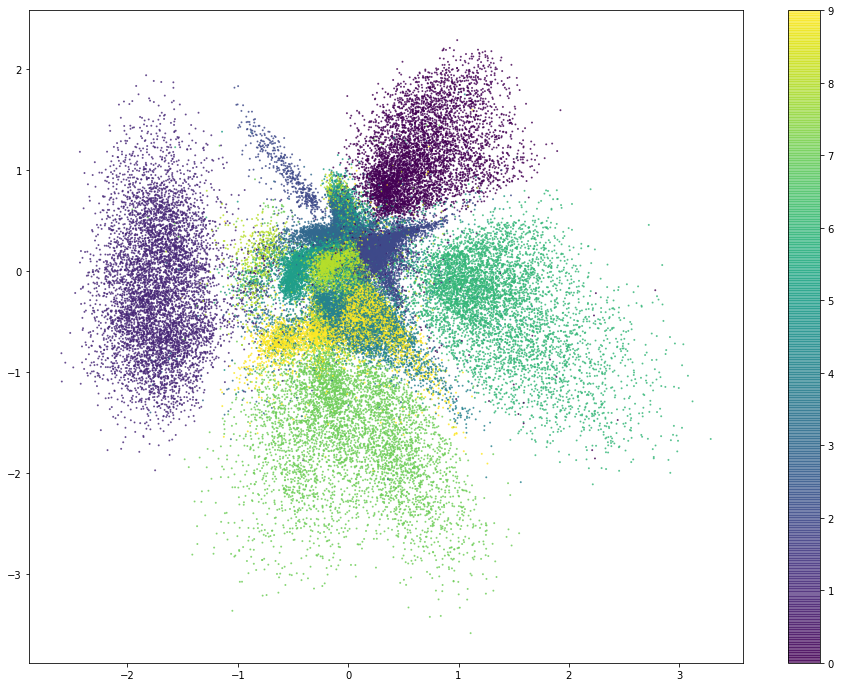

In [14]:
plt.figure(figsize=[16, 12])
plt.scatter(zs[:,0], zs[:,1], s=1, alpha=0.7, c=labels)
plt.colorbar()
plt.show()

Decode a set of points in a grid over the latent space

In [10]:
generations = []
for zx in np.linspace(-3, 3, 30):
    for zy in np.linspace(-3, 3, 30):
        z = torch.from_numpy(np.array([zx, zy]).astype(np.float32)[None])
        gen = vae.decoder(z).reshape(28, 28).data.numpy()
        generations.append(gen)

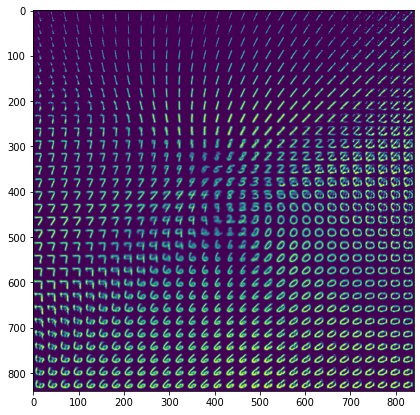

In [11]:
images_collage = build_collage(generations, 30, 30)
fig = plt.figure(figsize=[7, 7])
plt.imshow(images_collage)
plt.show()